<a href="https://colab.research.google.com/github/javilledo/machine-learning/blob/master/notebooks/t07_trees_%C3%A1rboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ÁRBOL DE DECISIÓN PARA ESPECIES DE FLORES

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
url = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/iris/iris.csv'
data = pd.read_csv(url)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

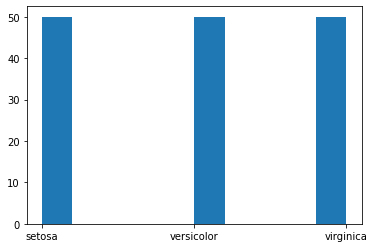

In [57]:
plt.hist(data.Species)

In [58]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [59]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]
colnames, predictors, target

(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'],
 ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],
 'Species')

In [60]:
import numpy as np

In [61]:
data['is_train'] = np.random.uniform(0, 1, len(data))  <= 0.75
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


(array([ 43.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 107.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

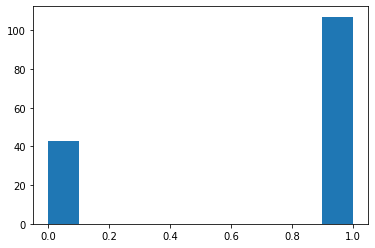

In [62]:
plt.hist(data.is_train.astype(int))

In [63]:
train, test = data[data['is_train'] == True], data[data['is_train'] == False]
train.shape, train.shape[0] / len(data), test.shape, test.shape[0]/len(data)

((107, 6), 0.7133333333333334, (43, 6), 0.2866666666666667)

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 20, random_state = 99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [66]:
preds = tree.predict(test[predictors])

In [67]:
pd.crosstab(test[target], preds, rownames=['Actual'], colnames = ['Predictions'])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,11,3
virginica,0,0,15


In [68]:
tree.score(test[predictors], test[target])

0.9302325581395349

##Visualización del árbol de decisión